## Методы на нейронных сетях

Подключаемые модули

In [1]:
import pandas as pd
import numpy as np
import pickle
import math

Подгрузка данных о доменных именах с диска 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

In [3]:
with open('/content/gdrive/My Drive/Colab Notebooks/Res/input data/training_data.pkl', 'rb') as f:
  training_data = pickle.load(f)

Общая коллекция данных

In [4]:
all_data_dict = pd.concat([training_data['legit'], training_data['dga']], ignore_index=True)

In [5]:
all_data_dict

,data,domain,family,type
0,NaN,netflix,NaN,0
1,NaN,netflix,NaN,0
2,NaN,netflix,NaN,0
3,NaN,netflix,NaN,0
4,NaN,google,NaN,0
5,NaN,google,NaN,0
6,NaN,microsoft,NaN,0
7,NaN,doubleclick,NaN,0
8,NaN,netflix,NaN,0
9,NaN,facebook,NaN,0


Массивы обучения

In [6]:
# Массив x хранит образцы обучения
# В массиве y хранятся целевые значения (метки типов) для образцов обучения
X = np.array(all_data_dict['domain'].tolist())
y = np.array(all_data_dict['type'].tolist())

In [7]:
X

array(['netflix', 'netflix', 'netflix', ..., 'tnddk', 'tndkd', 'tnkdd'],
      dtype='<U51')

In [8]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
from tensorflow.keras.preprocessing import sequence

In [10]:
# Создание словаря действительных символов
valid_chars = {x:idx+1 for idx, x in enumerate(set(''.join(X)))}

In [11]:
valid_chars

{'-': 29,
 '0': 24,
 '1': 20,
 '2': 19,
 '3': 5,
 '4': 9,
 '5': 14,
 '6': 16,
 '7': 28,
 '8': 35,
 '9': 6,
 'a': 22,
 'b': 21,
 'c': 3,
 'd': 4,
 'e': 1,
 'f': 8,
 'g': 37,
 'h': 36,
 'i': 2,
 'j': 11,
 'k': 26,
 'l': 15,
 'm': 17,
 'n': 31,
 'o': 25,
 'p': 27,
 'q': 18,
 'r': 32,
 's': 13,
 't': 12,
 'u': 33,
 'v': 7,
 'w': 34,
 'x': 23,
 'y': 30,
 'z': 10}

In [12]:
# Количество уникальных символов
max_features = len(valid_chars) + 1 

In [13]:
# Макс последовательность символов
maxlen = np.max([len(x) for x in X])
maxlen

51

In [14]:
# Преобразование символов в int и pad (последовательности одиннаковой длины)
X = [[valid_chars[y] for y in x] for x in X]
X = sequence.pad_sequences(X, maxlen=maxlen)

In [15]:
X

array([[ 0,  0,  0, ..., 15,  2, 23],
       [ 0,  0,  0, ..., 15,  2, 23],
       [ 0,  0,  0, ..., 15,  2, 23],
       ...,
       [ 0,  0,  0, ...,  4,  4, 26],
       [ 0,  0,  0, ...,  4, 26,  4],
       [ 0,  0,  0, ..., 26,  4,  4]], dtype=int32)

Построение модели

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, SimpleRNN, GRU, Convolution1D, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
# 33% для теста
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [18]:
# Метод Endgame (LSTM)
modelEnd = Sequential()
modelEnd.add(Embedding(max_features, 128, input_length=maxlen))
modelEnd.add(LSTM(128))
modelEnd.add(Dropout(rate=0.5))
modelEnd.add(Dense(1))
modelEnd.add(Activation('sigmoid'))
modelEnd.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
# Метод 2 (SimpleRNN)
modelSR = Sequential()
modelSR.add(Embedding(max_features, 128, input_length=maxlen))
modelSR.add(SimpleRNN(128))
modelSR.add(Dropout(rate=0.5))
modelSR.add(Dense(1))
modelSR.add(Activation('sigmoid'))
modelSR.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [20]:
# Метод 3 (GRU)
modelGRU = Sequential()
modelGRU.add(Embedding(max_features, 128, input_length=maxlen))
modelGRU.add(GRU(128))
modelGRU.add(Dropout(rate=0.5))
modelGRU.add(Dense(1))
modelGRU.add(Activation('sigmoid'))
modelGRU.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [21]:
# Метод 4 (CNN)
modelCNN = Sequential()
modelCNN.add(Embedding(max_features, 128, input_length=maxlen))
modelCNN.add(Convolution1D(filters=32, kernel_size=4))
modelCNN.add(GlobalMaxPooling1D())
modelCNN.add(Dense(128))
modelCNN.add(Dropout(rate=0.5))
modelCNN.add(Activation('relu'))
modelCNN.add(Dense(1))
modelCNN.add(Activation('sigmoid'))
modelCNN.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [22]:
# Игнорирование предостережения о нехватке памяти
import warnings
warnings.filterwarnings('ignore')

Обучение + кросс-валидация

In [23]:
names = ["Endgame (LSTM)", "SimpleRNN", "GRU", "CNN"]
models = [modelEnd, modelSR, modelGRU, modelCNN]

In [24]:
for model, name in zip(models, names):
    print(name)
    model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=1024, callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
    print("\n")

Endgame (LSTM)
Train on 1229635 samples, validate on 605642 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1229635/1229635 [==============================] - 254s 206us/sample - loss: 0.1752 - acc: 0.9381 - val_loss: 0.1155 - val_acc: 0.9633
Epoch 2/10
1229635/1229635 [==============================] - 276s 224us/sample - loss: 0.1029 - acc: 0.9677 - val_loss: 0.0883 - val_acc: 0.9725
Epoch 3/10
1229635/1229635 [==============================] - 283s 230us/sample - loss: 0.0853 - acc: 0.9736 - val_loss: 0.0795 - val_acc: 0.9752
Epoch 4/10
1229635/1229635 [==============================] - 278s 226us/sample - loss: 0.0760 - acc: 0.9767 - val_loss: 0.0728 - val_acc: 0.9775
Epoch 5/10
1229635/1229635 [==============================] - 280s 228us/sample - loss: 0.0696 - acc: 0.9788 - val_loss: 0.0738 - val_acc: 0.9775


SimpleRNN
Train on 1229635 samples, validate on 605642 samples
Epoch 1/10
1229635/1229635 [==============================] - 135s 110us/sample - loss: 0

Тестирование на отложенной выборке

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, matthews_corrcoef
from itertools import product

In [26]:
y_scoreEnd = modelEnd.predict_proba(X_test)
y_predEnd = y_scoreEnd.round()

y_scoreSR = modelSR.predict_proba(X_test)
y_predSR = y_scoreSR.round()

y_scoreGRU = modelGRU.predict_proba(X_test)
y_predGRU = y_scoreGRU.round()

y_scoreCNN = modelCNN.predict_proba(X_test)
y_predCNN = y_scoreCNN.round()

In [27]:
y_pred = [y_predEnd, y_predSR, y_predGRU, y_predCNN]
y_score = [y_scoreEnd, y_scoreSR, y_scoreGRU, y_scoreCNN]
labels = ['legit', 'dga']

In [28]:
for y_pr, y_sc, name in zip(y_pred, y_score, names):
    print(name)
    print("Accuracy score : ", accuracy_score(y_test, y_pr))
    print("Precision score : ", precision_score(y_test, y_pr))
    print("Recall score : ", recall_score(y_test, y_pr))
    print("F1 score : ", f1_score(y_test, y_pr))
    print("MCC score : ", matthews_corrcoef(y_test, y_pr))
    print("ROC AUC score : ", roc_auc_score(y_test, y_sc))
    print("Average Precision score : ", average_precision_score(y_test, y_sc))
    print("\n")


Endgame (LSTM)
Accuracy score :  0.9775378854174578
Precision score :  0.9896963123644251
Recall score :  0.9606169729266646
F1 score :  0.9749398549149494
MCC score :  0.9549443904742658
ROC AUC score :  0.9962651806612184
Average Precision score :  0.9959154370474439


SimpleRNN
Accuracy score :  0.9728139726108823
Precision score :  0.9868315696483281
Recall score :  0.9529465575698614
F1 score :  0.9695931034610121
MCC score :  0.9454961927085006
ROC AUC score :  0.9939843330960624
Average Precision score :  0.9934254690707368


GRU
Accuracy score :  0.982838046238537
Precision score :  0.9863603337810167
Recall score :  0.9757617778810341
F1 score :  0.9810324313671103
MCC score :  0.9654100043010685
ROC AUC score :  0.9974528931858281
Average Precision score :  0.997126187288743


CNN
Accuracy score :  0.971154576465965
Precision score :  0.9851267703091977
Recall score :  0.9509391085910104
F1 score :  0.967731091195224
MCC score :  0.9421472433792025
ROC AUC score :  0.99325269

Матрица ошибок (Confusion Matrix)

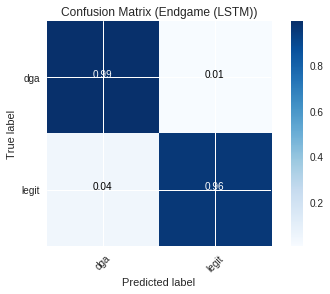

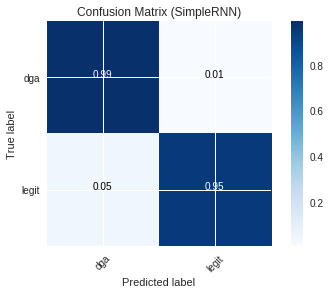

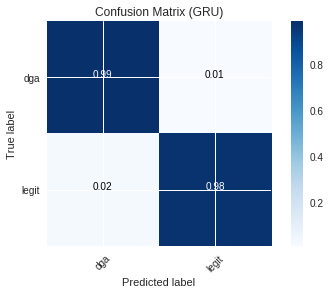

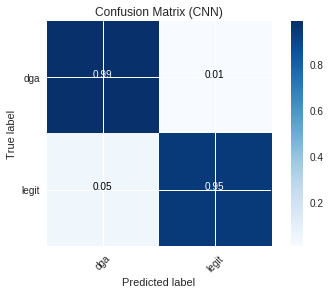

In [29]:
for y_pr, name in zip(y_pred, names):  
    cm = confusion_matrix(y_test, y_pr)
    np.set_printoptions(precision=2)

    cm = cm.astype('float') / cm.sum(axis=1).T[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix (" + name + ")")
    plt.colorbar()
    plt.xticks([1, 0], labels, rotation=45)
    plt.yticks([1, 0], labels)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
      horizontalalignment="center",
      color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

ROC-кривая

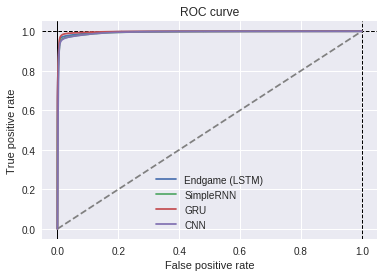

In [30]:
plt.figure()
plt.plot([0, 1], [0, 1], '--', color="grey")
plt.axvline(0, linestyle="-", c="black", lw=1)
plt.axvline(1, linestyle="--", c="black", lw=1)
plt.axhline(1, linestyle="--", c="black", lw=1)
for y_sc, name in zip(y_score, names):
    fpr, tpr, thresholds = roc_curve(y_test, y_sc)
    plt.plot(fpr, tpr, label=name)
plt.grid(True)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show() 

Кривая Точность-Полнота (Precision-Recall)

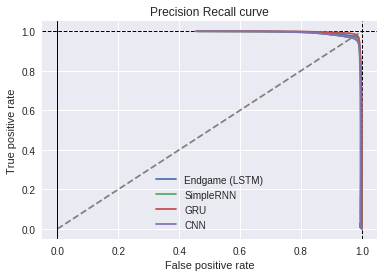

In [31]:
plt.figure()
plt.plot([0, 1], [0, 1], '--', color="grey")
plt.axvline(0, linestyle="-", c="black", lw=1)
plt.axvline(1, linestyle="--", c="black", lw=1)
plt.axhline(1, linestyle="--", c="black", lw=1)
for y_sc, name in zip(y_score, names):
    fpr, tpr, thresholds = precision_recall_curve(y_test, y_sc)
    plt.plot(fpr, tpr, label=name)
plt.grid(True)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Precision Recall curve')
plt.legend(loc='best')
plt.show()